<i>Written by: Ahsan Khan, On behalf of Alberta Machine Intelligence Institute for the Al Pathways Partnership supported by Prairies Economic Development Canada</i>

# Lab 2: Decision Trees

Following up from the KNN algorithm you will now be introduced to the Decision Tree algorithm. DTs are able to naturally handle non-linear multi-class data. The algorithm is not a distance based classifer like the KNN, instead it makes multiple binary classifications at each node (leaf) of the tree in order to arrived at a prediction. For this lab you will be using the built-in wine dataset. For this lab you will need to install the following extra libraries
- graphviz: 'pip install graphviz'
- pydotplus: 'pip install pydotplus'

In [1]:
#Crucial data processing and analysis libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Loading the modules required to build and evaluate a DT model
from sklearn.tree import DecisionTreeClassifier #The algorithm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


#Loading the wine dataset from sklearn
from sklearn.datasets import load_wine

##### Loading our data onto a dataframe the same way you encountered previously in lab 1.

In [2]:
#loading data
wine = load_wine()

# There are three key parts to the dataset we care about
#(1) The features(X)
X = wine.data


#(2) The target classes(y)
y = wine.target

df = pd.DataFrame(X, columns=wine['feature_names'])
df['class'] = wine.target


print("Number of rows in the data: " + str(df.shape[0]))
df.head()

Number of rows in the data: 178


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


##### Always a good idea to observe some statistics of our dataset to get an understanding of it.

In [3]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


# Lab Activity One: The Decision Tree Classifer

You can perform classification or regression using the decision tree algorithm. For this lab we will be only be dealing with classification problems and in the next lab you will get to work on regression problems.

> [A0] indicates an activity to be answered.

##### [A1] Split your data in training and testing sets

In [4]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### [A2] Instantiate a decision tree classifer

In [5]:
# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

##### [A3] Fit the classifier to your data

In [6]:
# Fit the classifier to the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

##### [A4] Predict on your X_test data

In [7]:
# Make predictions on the test data
y_pred = clf.predict(X_test)

##### [A5] Evaluate your models accuracy

In [8]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9444444444444444
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36

Confusion Matrix:
 [[13  1  0]
 [ 0 14  0]
 [ 1  0  7]]


Going back to your lab 1 notebook you will notice the accuracy for your first KNN model was significantly lower than the accuracy achieved in the first DT model here. Recall that you had to scale your data afterwards in order to achieve a decent accuracy score for the KNN classifer.

##### [A6] Scale your data using the standardscaler function. Instantiate a new model, fit your scaled data and finally evalaute the accuracy score.

In [9]:
#import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaler to the testing data for consistency
X_test_scaled = scaler.transform(X_test)

# Create a new decision tree classifier
dtree_scaled = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the scaled training data
dtree_scaled.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_scaled = dtree_scaled.predict(X_test_scaled)

# Evaluate the classifier
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

print("Accuracy scaled data):", accuracy_scaled)

Accuracy scaled data): 0.9444444444444444


##### [A7] Based on your results for the above two accuracy evaluations do you need to scale your data for a DT classifer? Explain.

Decision tree do not require the scaled data as the accuracy in both of the cases are same.But if we want to comapare different algorithms we need scaled data because it makes the workflow consistent.

## A Visual Representation of a Decision Tree in Detail

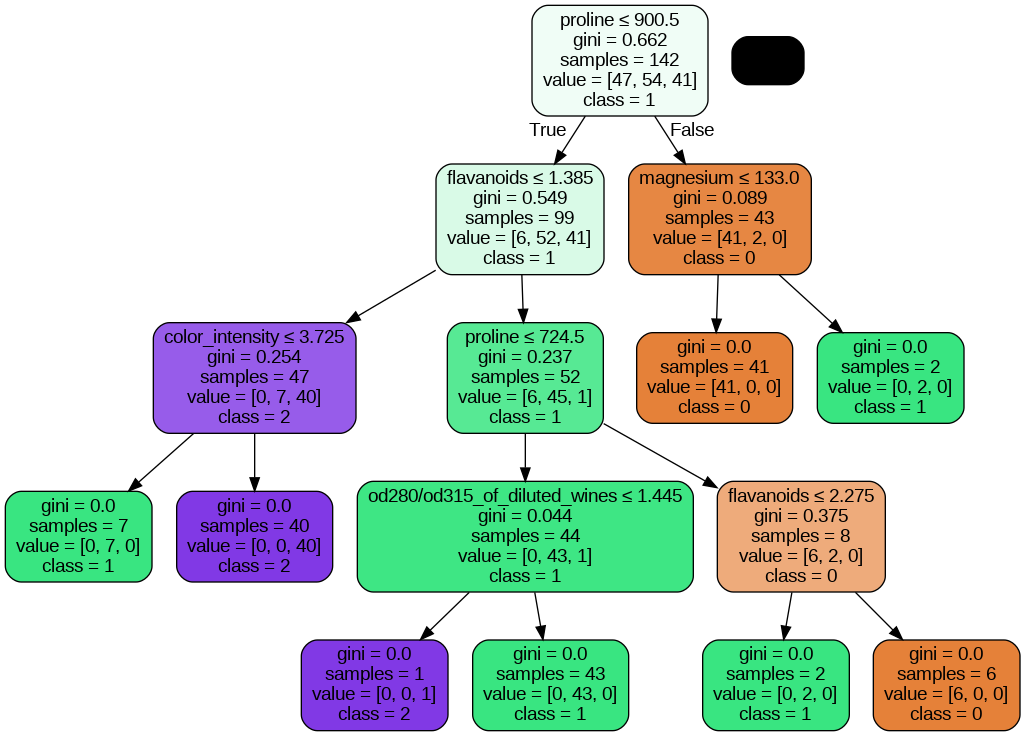

In [10]:
#Run this code cell to see how the tree is making a binary decision (true or false) at each node of the tree
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier #The algorithm

X = wine.data
y = wine.target

y_2 = [str(x) for x in y]
X_train, X_test, y_train, y_test = train_test_split(X,y_2,test_size=0.2)

DT_classifier_2 = DecisionTreeClassifier()
DT_classifier_2.fit(X_train, y_train)

dot_data = StringIO()
export_graphviz(DT_classifier_2, out_file=dot_data, feature_names=wine.feature_names, class_names= DT_classifier_2.classes_,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

##### You can see that each in node where a decision needs to be made, the algorithm determines a very a specific value of a feature and applies binary classification on how the tree system is further split.

Decision trees become more sensitive to the data as we move deeper into the tree and can induce bias in your model. A way to help with this is using multiple trees together (an ensemble) and which gives rise to an algorithm called 'Random Forest'. You will come across this in lab 4.

## Lab Acitivty Two: DT on Categorical Data

Download the play tennis dataset from kaggle here: https://www.kaggle.com/sdk1810/playtennis. This dataset contains weather conditions (features) which play a part in deciding whether someone plays tennis or not.

##### [A8] Load the play tennis csv and prepare it for machine learning

In [11]:
#reading the csv file
df = pd.read_csv('/content/PlayTennis.csv')
df.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


##### [A9] Instantiate and fit a decision tree classifer onto your data and then evaluate your model

In [12]:
#converting the data in the dummy which means converting the data into numerical by making new columns for each new data
df_dummy=pd.get_dummies(df , columns=['outlook','temp','humidity','windy'])

df_dummy.head()


,play,outlook_overcast,outlook_rainy,outlook_sunny,temp_cool,temp_hot,temp_mild,humidity_high,humidity_normal,windy_False,windy_True
0,no,0,0,1,0,1,0,1,0,1,0
1,no,0,0,1,0,1,0,1,0,0,1
2,yes,1,0,0,0,1,0,1,0,1,0
3,yes,0,1,0,0,0,1,1,0,1,0
4,yes,0,1,0,1,0,0,0,1,1,0


In [13]:
df_drop = df_dummy.drop(columns='play')#dropping the target class

df_new_dummy=df_drop.values#converting the dataframe into the array
df_new_dummy


array([[0, 0, 1, 0, 1, 0, 1, 0, 1, 0],
       [0, 0, 1, 0, 1, 0, 1, 0, 0, 1],
       [1, 0, 0, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 0, 0, 1, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 0, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 0, 1, 0, 1],
       [1, 0, 0, 1, 0, 0, 0, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 1, 0],
       [0, 0, 1, 1, 0, 0, 0, 1, 1, 0],
       [0, 1, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 0, 1, 0, 0, 1, 0, 1, 0, 1],
       [1, 0, 0, 0, 0, 1, 1, 0, 0, 1],
       [1, 0, 0, 0, 1, 0, 0, 1, 1, 0],
       [0, 1, 0, 0, 0, 1, 1, 0, 0, 1]], dtype=uint8)

In [14]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(df_new_dummy,df_dummy['play'] , test_size=0.2, random_state=42)

In [15]:
# Create a new decision tree classifier
DT_classifier_dummy = DecisionTreeClassifier()
DT_classifier_dummy.fit(X_train, y_train)


DecisionTreeClassifier()

In [16]:
y_pred = DT_classifier_dummy.predict(X_test)
ACCURACY=accuracy_score(y_test,y_pred )
ACCURACY

1.0

##### [A10] Visualize the tree in detail using a graphic library (You can use the code  above or find another method to visualize the tree. There are simpler ones out there)

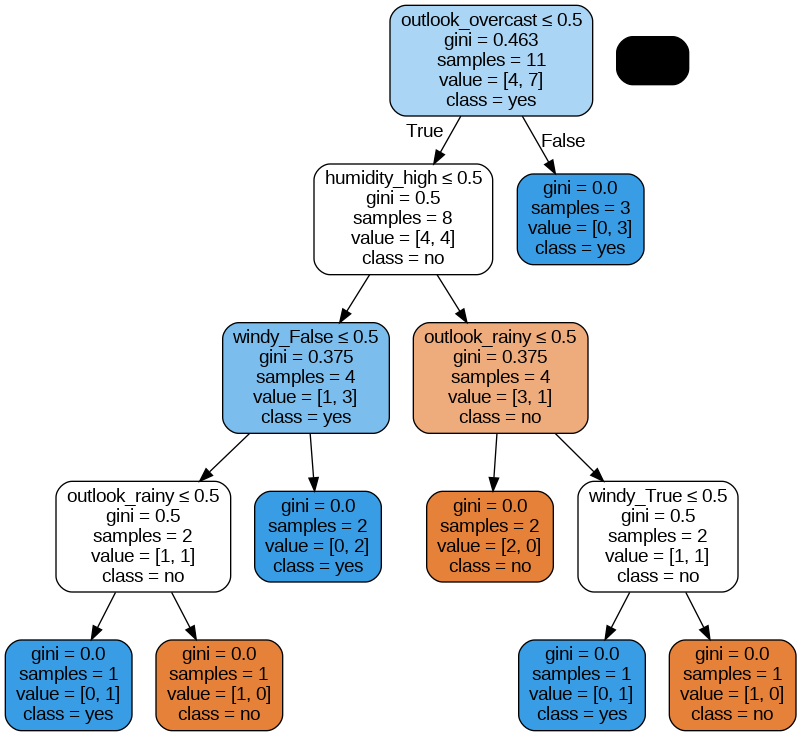

In [17]:
#visualizing the decision tree using a graphic tool in the sklearn library this tools is specially made for the decision tree
df_features = df_drop.columns
dot_data = StringIO()
export_graphviz(DT_classifier_dummy, out_file=dot_data, feature_names=df_features, class_names= DT_classifier_dummy.classes_,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())